In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from statsmodels.stats.diagnostic import het_arch
from statsmodels.tsa.vector_ar.irf import IRAnalysis
from statsmodels.stats.stattools import jarque_bera
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [2]:
dt= pd.read_csv('C:/Users/rohns/OneDrive/Desktop/AMFE project/FLRG Historical Data.csv')

In [3]:
df= dt.copy()
df.head()

,Date,Price,DCOILBRENTEU
0,02-05-2019,25.00,64.3
1,07-05-2019,25.02,66.41
2,08-05-2019,25.04,67.64
3,09-05-2019,25.00,66.65
4,10-05-2019,24.98,66.86


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1388 non-null   datetime64[ns]
 1   Price         1388 non-null   float64       
 2   DCOILBRENTEU  1349 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 32.7 KB


In [5]:
df['DCOILBRENTEU']=pd.to_numeric(df['DCOILBRENTEU'], errors='coerce')
df['Date']= pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

<AxesSubplot:>

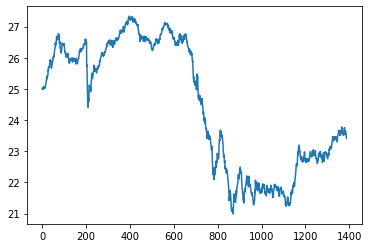

In [7]:
df['Price'].plot()

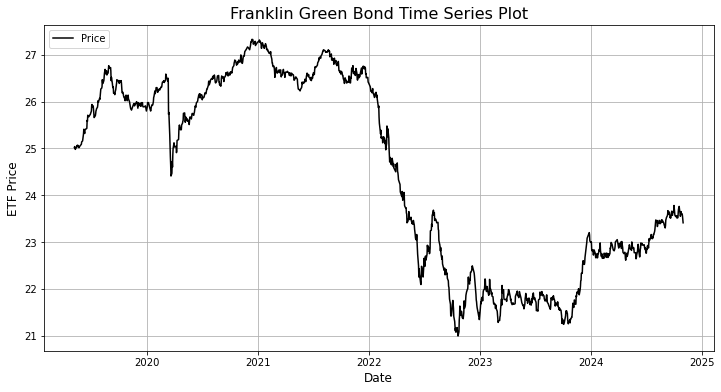

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='Price', color='black')
plt.title("Franklin Green Bond Time Series Plot", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("ETF Price", fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.show()

<AxesSubplot:>

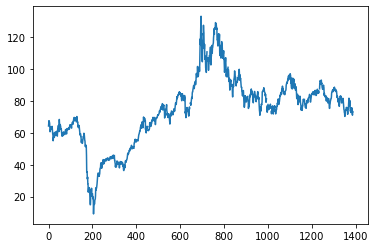

In [8]:
df['DCOILBRENTEU'].plot()

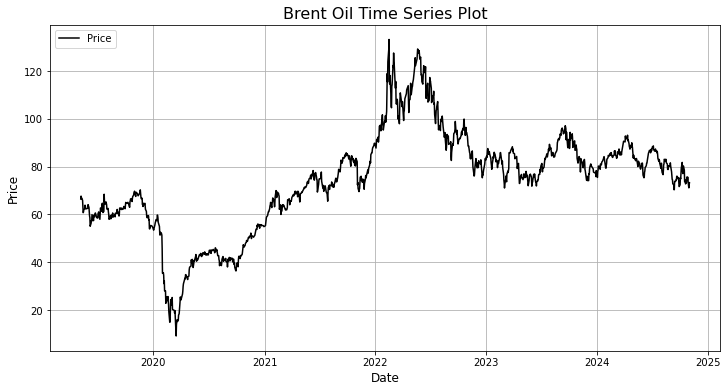

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Oil Price'], label='Price', color='black')
plt.title("Brent Oil Time Series Plot", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.show()

In [9]:
df= df.rename(columns={'DCOILBRENTEU':'Oil Price'})

In [10]:
df['% Change Price']= (df['Price']/df['Price'].shift(1))-1
df['% Change Oil Price']= (df['Oil Price']/ df['Oil Price'].shift(1))-1

In [11]:
df= df.dropna()

<AxesSubplot:>

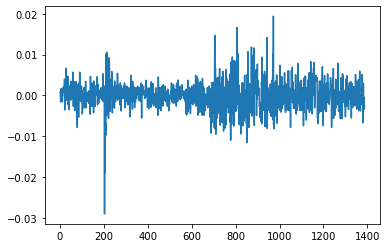

In [12]:
df['% Change Price'].plot()

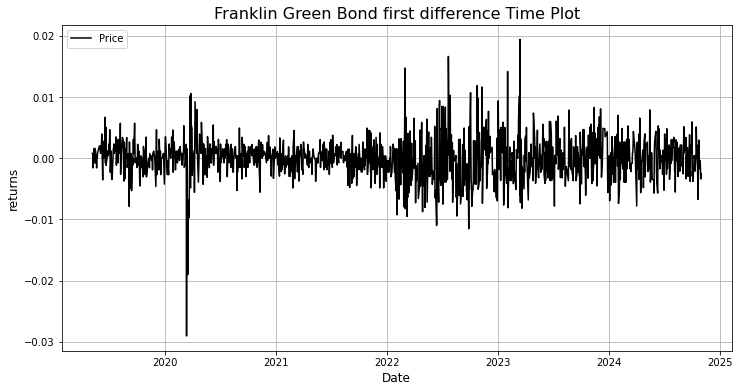

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['% Change Price'], label='Price', color='black')
plt.title("Franklin Green Bond first difference Time Plot", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("returns", fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.show()

<AxesSubplot:>

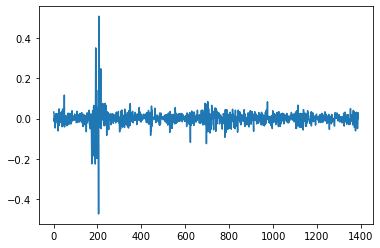

In [13]:
df['% Change Oil Price'].plot()

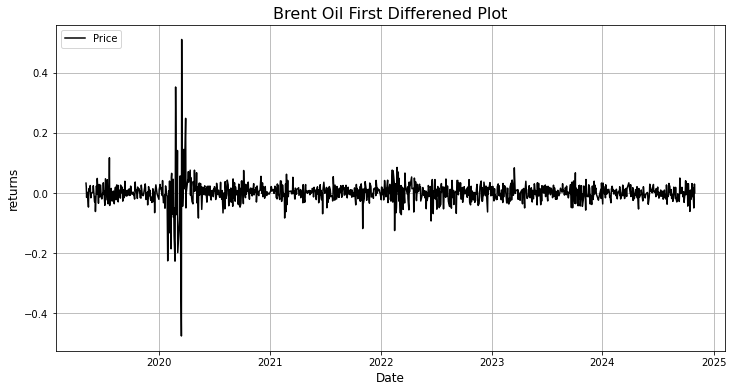

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['% Change Oil Price'], label='Price', color='black')
plt.title("Brent Oil First Differened Plot", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("returns", fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)
plt.show()

In [14]:
# Augmented Dickey-Fuller Test
def adf_test(series, title=""):
    print(f"Results of ADF Test for {title}")
    result = adfuller(series.dropna(), autolag='AIC')
    print(f"Test Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"# Lags Used: {result[2]}")
    print(f"Number of Observations: {result[3]}")
    print(f"Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")
    print("\n")
    return result

In [15]:
adf_test(df['Price'], "NAV")
adf_test(df['% Change Price'], "NAV Change%")
adf_test(df['Oil Price'], "EU_brentOIL")
adf_test(df['% Change Oil Price'], "EU_brentOIL % Change")

Results of ADF Test for NAV
Test Statistic: -0.8972439598309635
p-value: 0.7888786662442362
# Lags Used: 3
Number of Observations: 1313
Critical Values:
   1%: -3.435340198430096
   5%: -2.863743768394356
   10%: -2.567943297315671


Results of ADF Test for NAV Change%
Test Statistic: -17.36545418151305
p-value: 5.1742985986229885e-30
# Lags Used: 2
Number of Observations: 1314
Critical Values:
   1%: -3.435336393256612
   5%: -2.863742089354917
   10%: -2.5679424031562683


Results of ADF Test for EU_brentOIL
Test Statistic: -1.550126216183101
p-value: 0.508585148874114
# Lags Used: 7
Number of Observations: 1309
Critical Values:
   1%: -3.4353554773774553
   5%: -2.86375051023515
   10%: -2.5679468876340037


Results of ADF Test for EU_brentOIL % Change
Test Statistic: -7.337571648936154
p-value: 1.0863670341972283e-10
# Lags Used: 18
Number of Observations: 1298
Critical Values:
   1%: -3.4353979810093374
   5%: -2.863769264797245
   10%: -2.5679568752685773




(-7.337571648936154,
 1.0863670341972283e-10,
 18,
 1298,
 {'1%': -3.4353979810093374,
  '5%': -2.863769264797245,
  '10%': -2.5679568752685773},
 -4951.2447437771325)

In [ ]:

clean_df= df.iloc[:,1:3]
clean_df.head()


In [17]:
#Johansen Cointegration Test

johansen_test = coint_johansen(clean_df, det_order=0, k_ar_diff=1)

# Print eigenvalues
print("Eigenvalues:")
print(johansen_test.eig)

# Print the trace statistic
print("\nTrace Statistic:")
print(johansen_test.lr1)

# Print critical values for the trace statistic
print("\nCritical Values (90%, 95%, 99%):")
print(johansen_test.cvt)

# Check the maximum eigenvalue statistic
print("\nMax-Eigenvalue Statistic:")
print(johansen_test.lr2)

# Print critical values for the maximum eigenvalue statistic
print("\nCritical Values for Max-Eigenvalue (90%, 95%, 99%):")
print(johansen_test.cvm)

Eigenvalues:
[0.0097005  0.00127791]

Trace Statistic:
[14.49995797  1.6815274 ]

Critical Values (90%, 95%, 99%):
[[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]

Max-Eigenvalue Statistic:
[12.81843057  1.6815274 ]

Critical Values for Max-Eigenvalue (90%, 95%, 99%):
[[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]


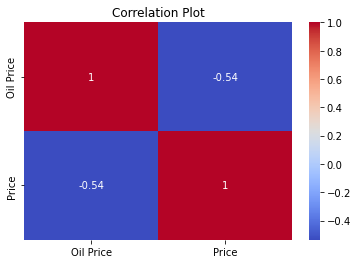

In [43]:
#Correlation Heatmap
sns.heatmap(df[['Oil Price', 'Price']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Plot')
plt.show()

In [19]:
clean_df_change= df.iloc[:,3:]
clean_df_change.head()

,% Change Price,% Change Oil Price
1,0.000800,0.032815
2,0.000799,0.018521
3,-0.001597,-0.014636
4,-0.000800,0.003151
5,0.001601,-0.014807


In [20]:
from statsmodels.tsa.api import VAR
model = VAR(clean_df_change)

order_selection = model.select_order(maxlags=6)
print("Optimal Lag Order:", order_selection.selected_orders)

Optimal Lag Order: {'aic': 6, 'bic': 3, 'hqic': 6, 'fpe': 6}


C:\Users\rohns\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [39]:
optimal_lag = order_selection.selected_orders['hqic']  # Example using AIC
var_model = model.fit(optimal_lag)
print(var_model.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 20, Nov, 2024
Time:                     14:03:34
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -17.9443
Nobs:                     1311.00    HQIC:                  -18.0085
Log likelihood:           8135.38    FPE:                1.45302e-08
AIC:                     -18.0470    Det(Omega_mle):     1.42462e-08
--------------------------------------------------------------------
Results for equation % Change Price
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                        -0.000032         0.000093           -0.346           0.729
L1.% Change Price             0.029545         0.027733            1.065           0.287
L1.% Change Oil Pri

In [22]:
# Residuals
residuals = var_model.resid
print(residuals)

      % Change Price  % Change Oil Price
7           0.001675           -0.044395
8          -0.000580            0.006956
9           0.001425            0.004252
10         -0.000018            0.010392
11         -0.001423            0.023494
...              ...                 ...
1383       -0.001783            0.016776
1384       -0.000906           -0.059915
1385       -0.002300           -0.006032
1386       -0.002814            0.025165
1387       -0.001908           -0.003249

[1311 rows x 2 columns]


In [23]:
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residuals.values)
print("Durbin-Watson Test:", dw)

Durbin-Watson Test: [1.9966938  1.96421741]


In [24]:
# Jarque-Bera Test
for col in residuals.columns:
    jb = jarque_bera(residuals[col])
    print(f"Jarque-Bera Test for {col}: {jb}")

Jarque-Bera Test for % Change Price: (1599.538220298032, 0.0, -0.15474718431846654, 8.402441804569884)
Jarque-Bera Test for % Change Oil Price: (92169.05930230084, 0.0, 0.158663019256439, 44.07559783663548)


In [40]:
# Granger Causality Test
granger_Price = var_model.test_causality('% Change Price', '% Change Oil Price', kind='f')
granger_Oil_Price = var_model.test_causality('% Change Oil Price', '% Change Price', kind='f')
print("Granger Causality Price -> Oil Price:", granger_Price.summary())
print("Granger Causality Oil Price-> Price:", granger_Oil_Price.summary())

Granger Causality Price -> Oil Price: Granger causality F-test. H_0: % Change Oil Price does not Granger-cause % Change Price. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
         2.808          2.102   0.010 (6, 2596)
-----------------------------------------------
Granger Causality Oil Price-> Price: Granger causality F-test. H_0: % Change Price does not Granger-cause % Change Oil Price. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df   
-----------------------------------------------
         6.206          2.102   0.000 (6, 2596)
-----------------------------------------------


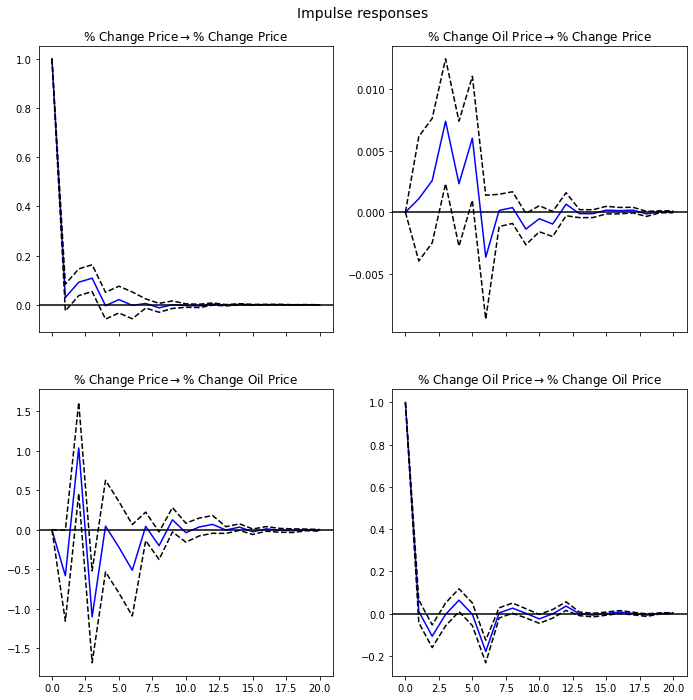

In [26]:
# Impulse Response Function
irf = var_model.irf(20)
irf.plot(orth=False)
plt.show()

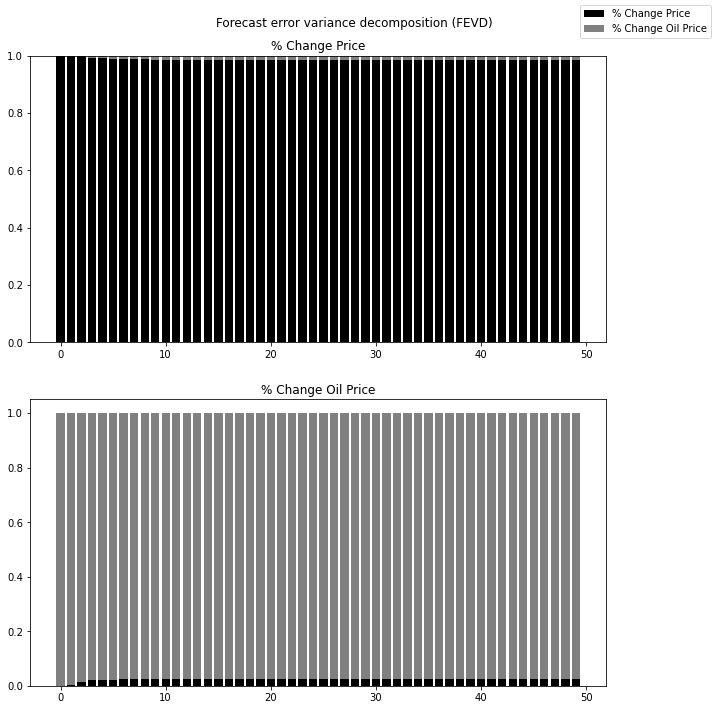

In [27]:
# Forecast Error Variance Decomposition (FEVD)
fevd = var_model.fevd(50)
fevd.plot()
plt.show()